In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df = pd.read_csv(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code\done_data.csv")
df.loc[:, 'target_return'] = df.groupby('tic')['adjcp'].apply(lambda x: x.pct_change().shift(-1))
df.dropna(inplace = True)

In [6]:
df['macd'].min()

-57.21984899170776

In [7]:
df['macd'].max()

22.87714806906007

<AxesSubplot:xlabel='datadate'>

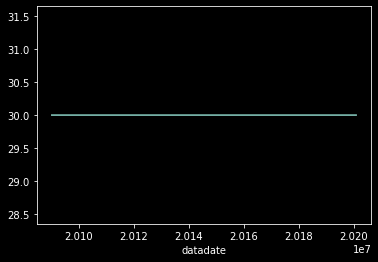

In [8]:
df.groupby('datadate')['tic'].count().plot()

In [9]:
len(df['tic'].unique())

30

In [10]:
# features = ['macd', 'rsi', 'cci', 'adx']
features = ['macd']
target = ['target_return']
NORMALIZER = 100

In [11]:
X = df.pivot(index = 'datadate', columns = 'tic', values = features).values
y = df.pivot(index = 'datadate', columns = 'tic', values = target).values * NORMALIZER

In [12]:
print(X.shape, y.shape)

(2925, 30) (2925, 30)


In [13]:
# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(n_outputs, activation='linear'))
    model.compile(loss='mae', optimizer='adam')
    return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    model = get_model(n_inputs, n_outputs)
    # fit model
    model.fit(X, y, verbose=0, epochs=100)
    # evaluate model on test set
    mae = model.evaluate(X, y, verbose=0)
    # store result
    print('>%.3f' % mae)
    return model

# evaluate model
model = evaluate_model(X, y)

>0.999


In [14]:
yhat = model.predict(X)/NORMALIZER

In [15]:
np.corrcoef(yhat.reshape(-1), y.reshape(-1))

array([[1.        , 0.34305029],
       [0.34305029, 1.        ]])

In [16]:
pnl = (yhat * y).sum(axis = 1)

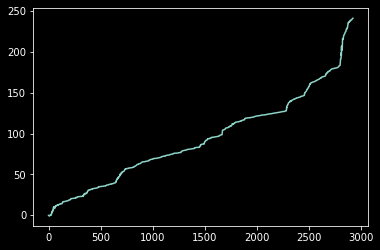

In [17]:
plt.plot((pnl).cumsum())

In [26]:
sample_actions = pd.read_pickle(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code\list_actions_mv.pkl")

In [27]:
yhat_rl = np.array(sample_actions)

In [28]:
np.corrcoef(yhat_rl.reshape(-1), y.reshape(-1))

array([[1.        , 0.01490358],
       [0.01490358, 1.        ]])

In [29]:
np.corrcoef(yhat_rl.reshape(-1), yhat.reshape(-1))

array([[1.        , 0.01605182],
       [0.01605182, 1.        ]])

In [30]:
pnl_rl = (yhat_rl * y).sum(axis = 1)

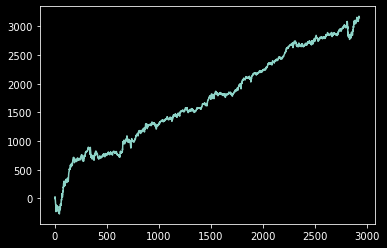

In [31]:
plt.plot((pnl_rl).cumsum())

(array([29958.,   746.,   779.,   879.,   887.,  1110.,  1139.,  1243.,
         1725., 49284.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

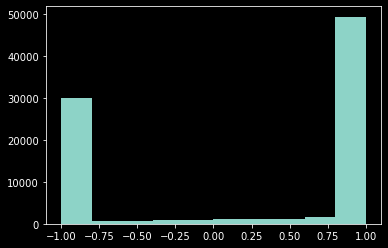

In [32]:
plt.hist(np.array(sample_actions).reshape(-1))

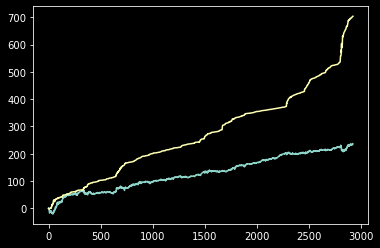

In [33]:
plt.plot((pnl_rl/pnl_rl.std()).cumsum())
plt.plot((pnl/pnl.std()).cumsum())